In [48]:
import data_api as api
import matplotlib.pyplot as plt
import numpy as np
import h5py as h5
import epics as ep
from time import sleep
%matplotlib notebook

## Back ground data taken: Jun  6 11:09 SARFE10-PSSS059:FPICTURE_11968844720_12.h5

In [3]:
time_start = "2020-06-06 17:15:00"
time_end = "2020-06-06 17:15:10"
PSSS = "SARFE10-PSSS059:SPECTRUM_Y"

In [4]:
PSSS_y = api.get_data(channels=[PSSS],
                    start=time_start, 
                    end=time_end)

[INFO] indexing will be done on globalDate
[DEBUG] Starting new HTTPS connection (1): data-api.psi.ch
[DEBUG] https://data-api.psi.ch:443 "POST //sf/query HTTP/1.1" 200 None


In [5]:
print(PSSS_y.keys())

Index(['pulseId', 'globalSeconds', 'eventCount', 'SARFE10-PSSS059:SPECTRUM_Y',
       'globalNanoseconds'],
      dtype='object')


In [62]:
!pwd

/sf/alvra/config/src/python/photodiag/PhotonDiagControl/Alvra


In [6]:
psss_keys = PSSS_y['SARFE10-PSSS059:SPECTRUM_Y'].keys()

In [12]:
specs = 10

In [14]:
spectrum = []
for i in range(0,specs):
    spectrum.append(np.asarray(PSSS_y['SARFE10-PSSS059:SPECTRUM_Y'][psss_keys[i]]))

## load background

In [63]:
bg_fn = '/sf/photo/psss/bg/SARFE10-PSSS059:FPICTURE_11968844720_12.h5'
bg = f = h5.File(bg_fn, 'r')

In [33]:
BG = np.asarray(bg['image'])

<IPython.core.display.Javascript object>


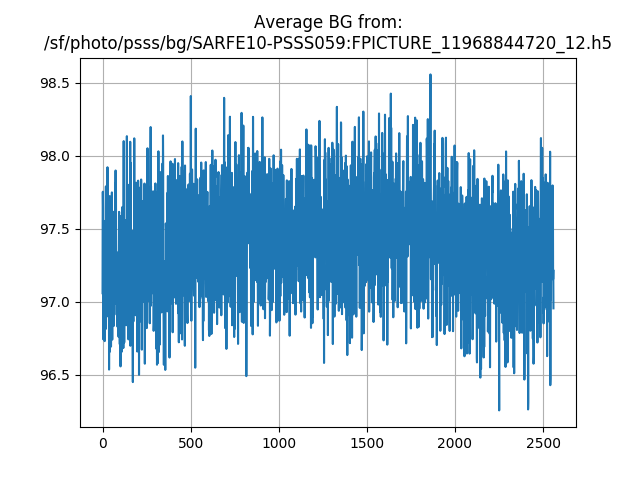

Text(0.5,1,'Average BG from:\n/sf/photo/psss/bg/SARFE10-PSSS059:FPICTURE_11968844720_12.h5')

In [40]:
plt.figure()
plt.plot(BG.mean(axis=0))
plt.grid(True)
plt.title('Average BG from:\n' + bg_fn)

## Dark spectra from epics

In [49]:
numShots = 10
BG_epics = []
for i in range(0, numShots):
    BG_epics.append(ep.caget('SARFE10-PSSS059:SPECTRUM_Y'))
    sleep(1.5)
BG_epics = np.asarray(BG_epics)    

<IPython.core.display.Javascript object>


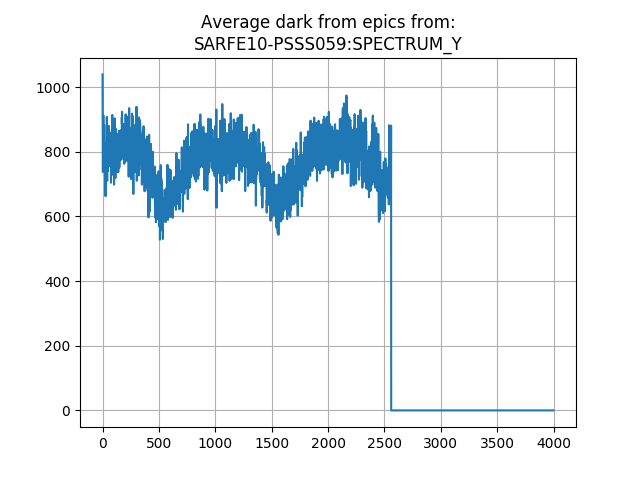

Text(0.5,1,'Average dark from epics from:\nSARFE10-PSSS059:SPECTRUM_Y')

In [65]:
plt.figure()
plt.plot(BG_epics.mean(axis=0))
plt.grid(True)
plt.title('Average dark from epics from:\n' + 'SARFE10-PSSS059:SPECTRUM_Y')

<IPython.core.display.Javascript object>


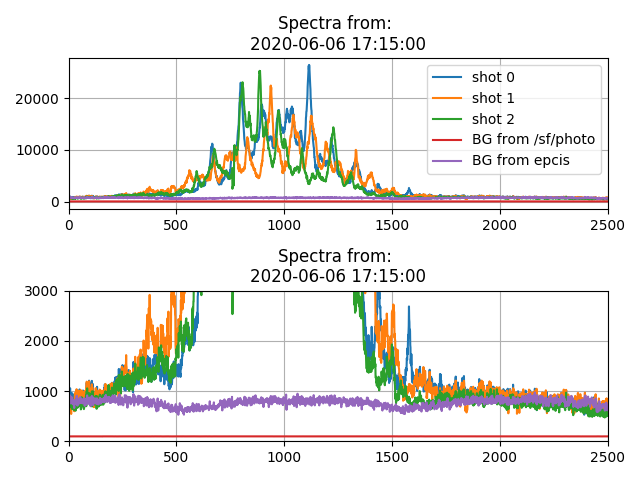

In [61]:
plt.figure()
plt.subplot(211)
plt.title('Spectra from: \n'+ time_start)
plt.plot(spectrum[0], label= 'shot '+str(0))
plt.plot(spectrum[1], label= 'shot '+str(1))
plt.plot(spectrum[2], label= 'shot '+str(2))
plt.plot(BG.mean(axis=0), label= 'BG from /sf/photo')
plt.plot(BG_epics.mean(axis=0), label= "BG from epcis")
plt.grid()
plt.xlim([0,2500])
plt.legend()

plt.subplot(212)
plt.title('Spectra from: \n'+ time_start)
plt.plot(spectrum[0], label= 'shot '+str(0))
plt.plot(spectrum[1], label= 'shot '+str(1))
plt.plot(spectrum[2], label= 'shot '+str(2))
plt.plot(BG.mean(axis=0), label= 'BG from /sf/photo')
plt.plot(BG_epics.mean(axis=0), label= "BG from epcis")
plt.grid()
plt.xlim([0,2500])
plt.ylim([0, 3000])
plt.tight_layout()